In [48]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.font_manager as fm

from matplotlib.font_manager import FontProperties

In [49]:
os.chdir('/home/a03-sgoel/FLaT/results')

In [50]:
# Load FLaT results
flat = pd.read_csv(f"/home/a03-sgoel/FLaT/results/optim/energy/solubility/07-26/transformer_optim_seqs.csv")

In [51]:
# Read and process test set data
true = pd.read_csv("/home/a03-sgoel/FLaT/results/true_data/solubility/seqs_with_ppl.csv")

In [52]:
# flat = flat['PPL'].tolist()
# true = true['OG Sequence PPL'].tolist()

In [53]:
true = flat.copy()

flat = flat['Optim Vals'].tolist()
true = true['OG Vals'].tolist()

In [54]:
# Calculate means
means = {
    "FLaT": np.mean(flat),
    "True Data": np.mean(true)
}

In [55]:
print(means)

{'FLaT': 0.48444836040213707, 'True Data': 0.42108451951743336}


In [56]:
colors = {"FLaT": '#0A5B93', 'True Data': '#242834'}

In [57]:
font_path = "/home/a03-sgoel/MeMDLM_v2/src/utils/ubuntu_font/"

regular_font_path = os.path.join(font_path + 'Ubuntu-Regular.ttf')
bold_font_path = os.path.join(font_path + 'Ubuntu-Bold.ttf')
italic_font_path = os.path.join(font_path + 'Ubuntu-Italic.ttf')
bold_italic_font_path = os.path.join(font_path + 'Ubuntu-BoldItalic.ttf')

# Load the font properties
regular_font = FontProperties(fname=regular_font_path)
bold_font = FontProperties(fname=bold_font_path)
italic_font = FontProperties(fname=italic_font_path)
bold_italic_font = FontProperties(fname=bold_italic_font_path)

# Add the fonts to the font manager
fm.fontManager.addfont(regular_font_path)
fm.fontManager.addfont(bold_font_path)
fm.fontManager.addfont(italic_font_path)
fm.fontManager.addfont(bold_italic_font_path)

# Set the font family globally to Ubuntu
plt.rcParams['font.family'] = regular_font.get_name()
plt.rcParams['font.family'] = regular_font.get_name()
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = regular_font.get_name()
plt.rcParams['mathtext.it'] = italic_font.get_name()
plt.rcParams['mathtext.bf'] = bold_font.get_name()

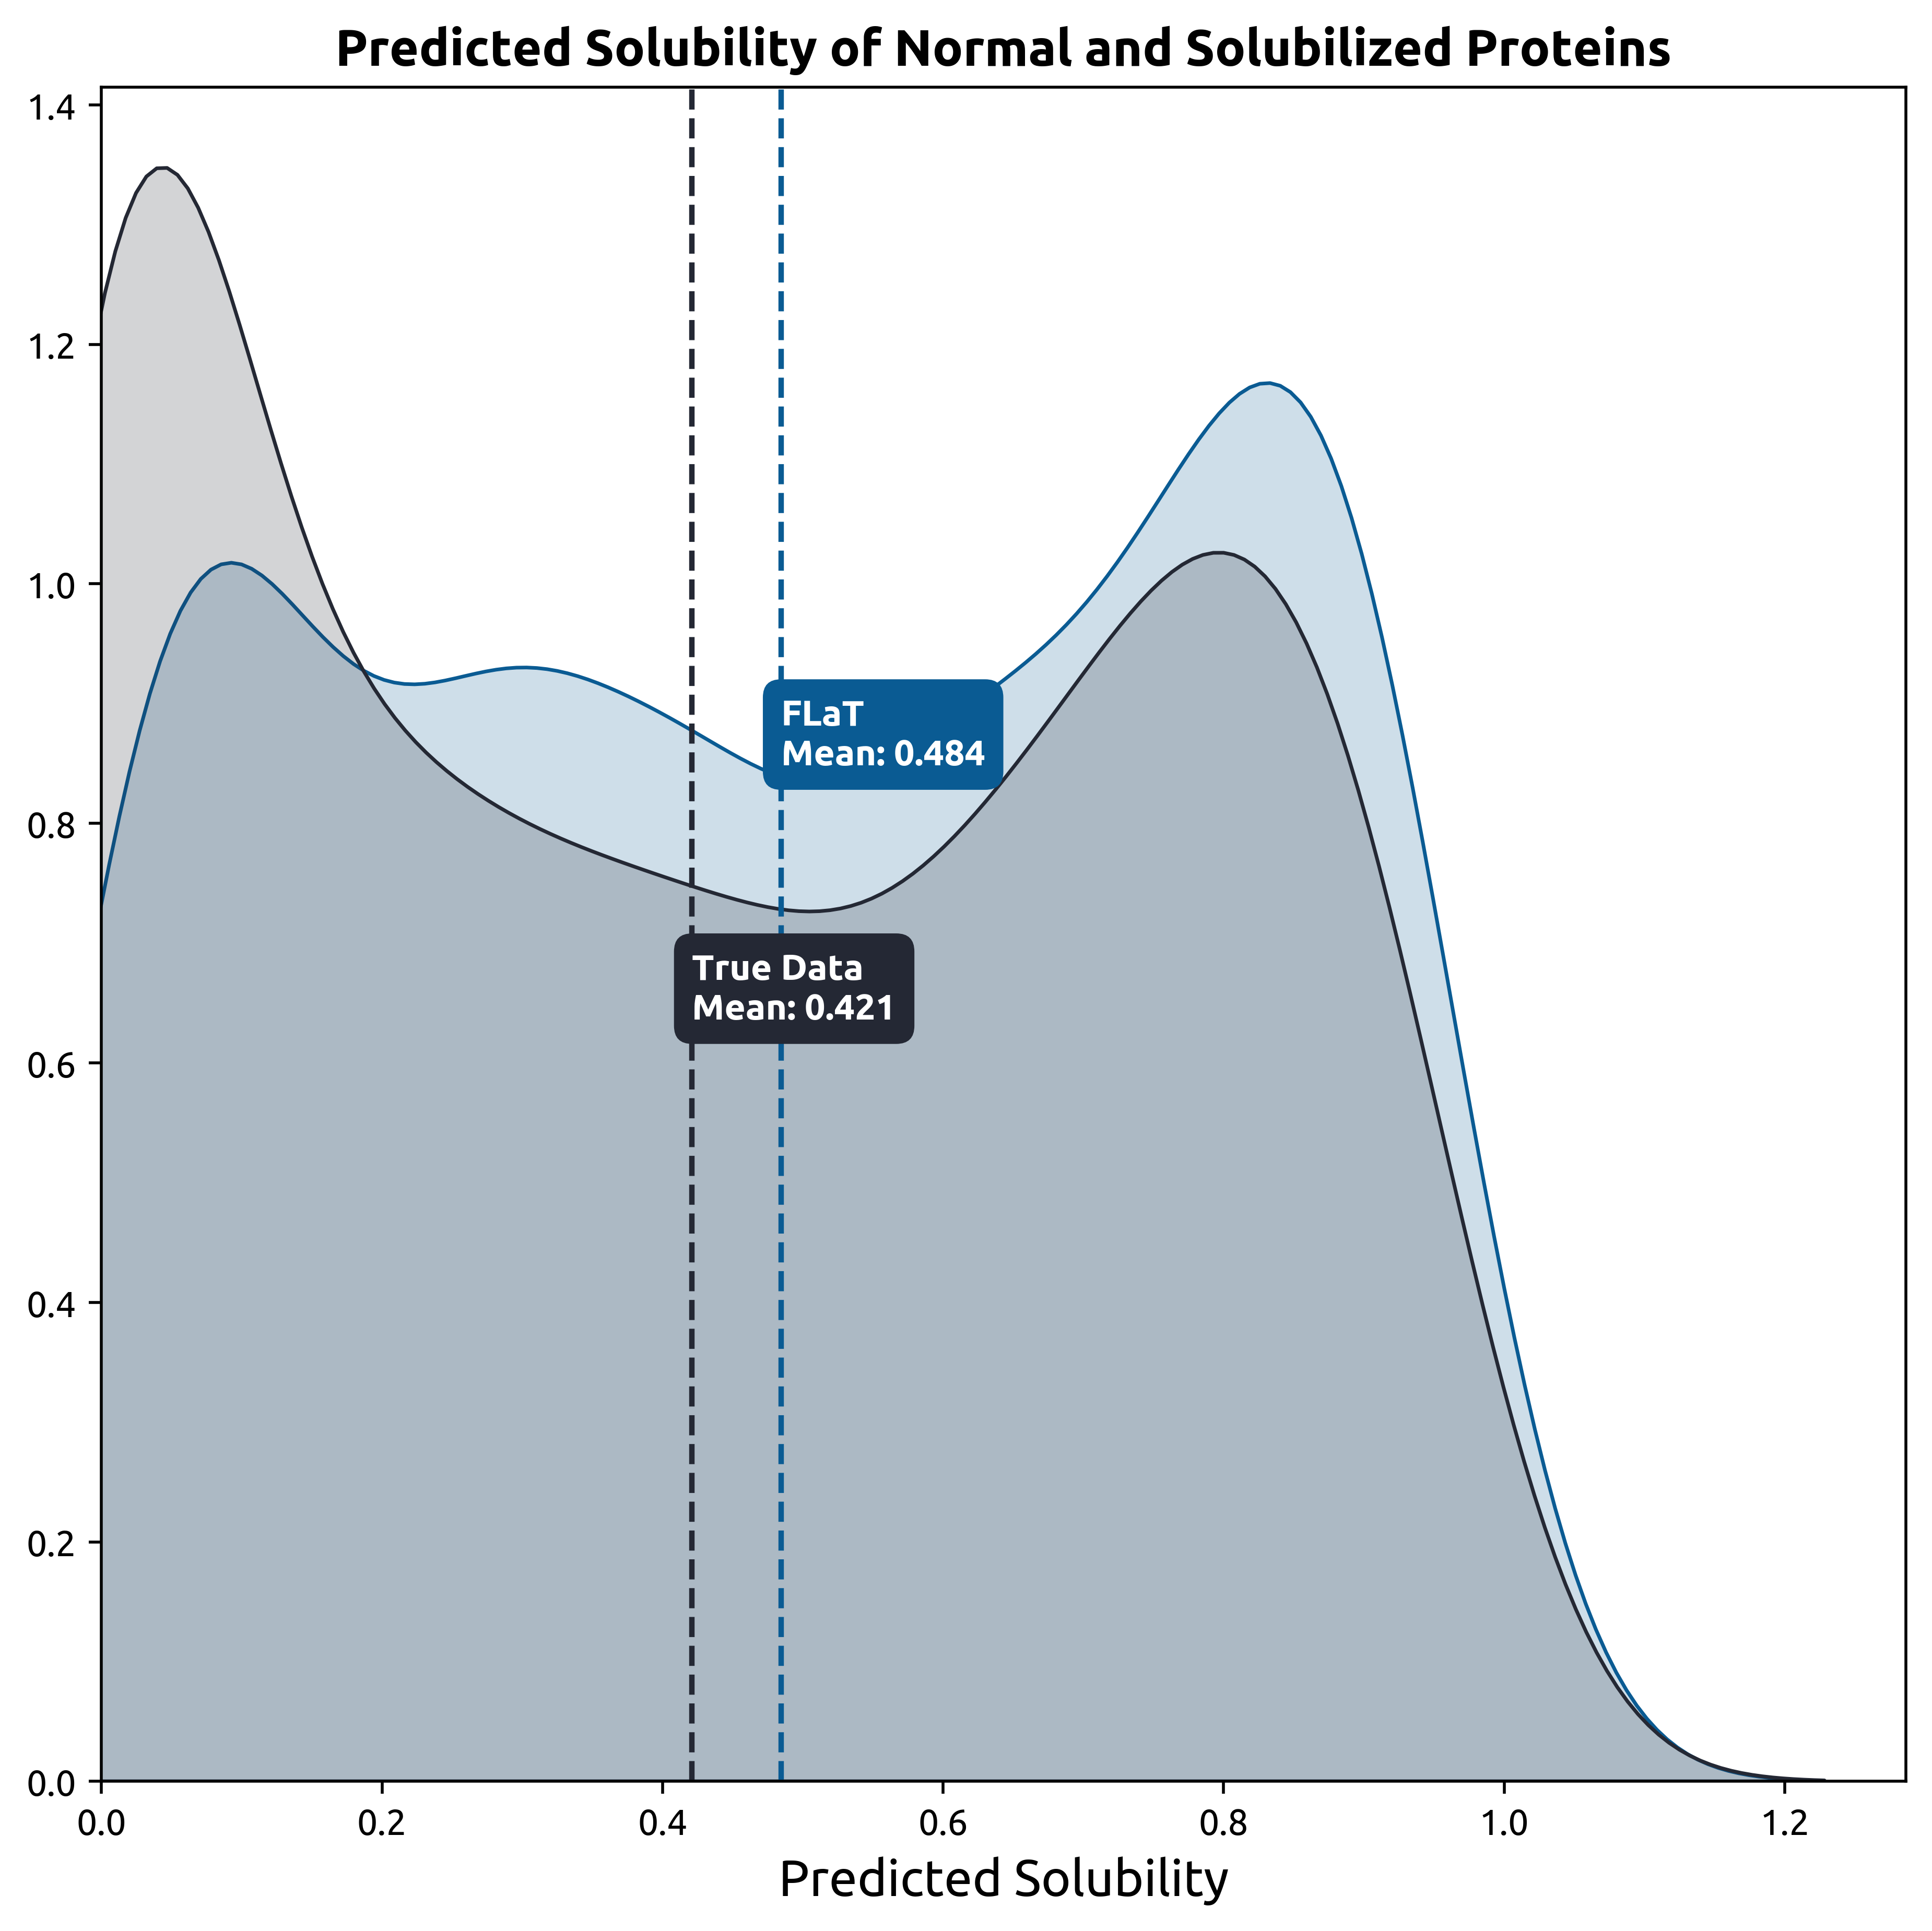

In [58]:
# Plot
plt.figure(figsize=(7.5, 7.5), dpi=500)
sns.kdeplot(flat, label='FLaT', linewidth=1, color=colors['FLaT'], fill=True, alpha=0.2)
sns.kdeplot(true, label='True Data', linewidth=1, color=colors['True Data'], fill=True, alpha=0.2)

# Draw mean lines and annotate
right=False
# Draw mean lines and annotate at staggered heights
heights = [0.6, 0.45, 0.3]  # vertical positions as fractions of ylim
for (label, data, height) in zip(means.keys(), [flat, true], heights):
    mean_val = means[label]
    plt.axvline(mean_val, linestyle='--', color=colors[label])

    plt.text(
        mean_val,
        plt.ylim()[1] * height,  # staggered Y position
        f"{label}\nMean: {mean_val:.3f}",
        color='white',
        weight='bold',
        bbox=dict(boxstyle="round,pad=0.5", fc=colors[label], ec="none"),
        #ha='right' if label == list(means.keys())[0] else 'left'
        ha='right' if right==True else 'left'
    )



# Styling
plt.title("Predicted Solubility of Normal and Solubilized Proteins", fontsize=14, weight='bold')
plt.xlabel('Predicted Solubility', fontsize=14)
plt.ylabel("")
#plt.xlim(-4, 11)
plt.xlim(0, max(np.max(true), np.max(flat)) * 1.3)
plt.grid(False)
plt.tight_layout()
plt.savefig("/home/a03-sgoel/FLaT/results/optim/energy/solubility/07-26/vals.png")
plt.show()